# 导数与梯度下降


这门课程介绍了梯度下降算法，这是深度学习的基石。为了更好地理解它，让我们回顾一下导数的概念。


In [1]:
import matplotlib.pyplot as plt 
import numpy as np

## 导数的直观理解


让我们考虑一个函数：$f(x) = 2x^2 - 3x + 4$


In [3]:
def f(x):
  return 2*x**2-3*x+4
f(3)

13

让我们使用 matplotlib 绘制这个函数。


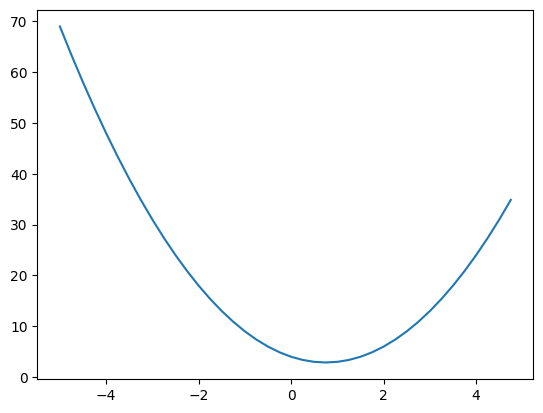

In [4]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

导数给出了曲线在某一点的切线斜率。
为了计算它，我们使用以下公式：
$f'(x) = \lim_{h \to 0} \frac{f(x+h)-h}{h}$
当 $h$ 很小时，我们可以数值估计斜率。

**注**：斜率显示了 $x$ 变化时 $y$ 的变化情况。如果 $x$ 增加 1，而 $y$ 增加 2，那么斜率为 2。


In [4]:
h=0.0001
x=-1.0
print("Dérivée en x=-1 : ", (f(x+h)-f(x))/h)
x=2.0
print("Dérivée en x=2 : ", (f(x+h)-f(x))/h)

Dérivée en x=-1 :  -6.999800000002665
Dérivée en x=2 :  5.000200000004895


图表显示在 $x=-1$ 时斜率为负，在 $x=2$ 时斜率为正。
导数的 **符号** 表示斜率的方向，其 **值** 表示斜率的强度。
让我们参考 [常见导数](https://en.wikipedia.org/wiki/Table_of_derivatives) 验证：
对于 $f(x)=2x²-3x+4$，我们有 $f'(x)=4x-3$。
我们发现 $f'(-1) \approx -7$ 和 $f'(2) \approx 5$。
结果不精确，因为 $h$ 不是无限小。


In [5]:
# On définit deriv_f = f'(x)
def deriv_f(x):
  return 4*x-3

## 梯度下降的优化基础


优化旨在最小化或最大化目标函数。
为了找到最小值，有两种方法：
1. 解 $f'(x)=0$：
   $4x-3=0 \implies x=\frac{3}{4}$。
   这在本例中给出了最小值，但并非总是如此。

2. 使用 **梯度下降**：
   从一个点开始，例如 $x=2$。
   计算 $f'(2)=5$。正斜率意味着如果 $x$ 增加，$f(x)$ 也会增加，反之亦然。
   为了最小化 $f(x)$，调整 $x$ 使用一个因子 $\alpha$（学习率）。
   我们得到 $x_{new}=x - slope \times \alpha=2-0.5=1.5$。
   重新计算 $f'(1.5)=3$，仍然为正，因此我们进一步减小 $x$。
   梯度下降在循环中调整 $x$，直到达到最小值，考虑斜率。


In [6]:
# Descente du gradient
x=2.0 # valeur aléatoire de x
alpha=0.01 # pas
iterations=250 # nombre d'itérations

for i in range(iterations):
  grad=deriv_f(x)
  if (grad>0):
    x=x-alpha
  elif(grad<0):
    x=x+alpha
  else:
    print("minimum found YAY, x = ",x)
print("approximate minimum found YAY, x = ",x)

approximate minimum found YAY, x =  0.7599999999999989


我们得到 $x \approx \frac{3}{4}$。使用更小的步长（$\alpha$）和更多的迭代次数，我们可以精细化结果。


## 链式法则


在继续之前，让我们回顾一下深度学习的一个关键数学规则：链式法则。
它允许我们训练网络隐藏层的参数。
如果 $y$ 依赖于 $u$，而 $u$ 又依赖于 $x$，那么：
$\frac{dy}{dx}=\frac{dy}{du}\cdot\frac{du}{dx}$


让我们以依赖函数为例：
$u=2x²-x-2$
$y=3u+1$
$\frac{dy}{dx}=\frac{dy}{du}\cdot\frac{du}{dx}$，其中 $\frac{dy}{du}=3$ 和 $\frac{du}{dx}=2x-1$
$\frac{dy}{dx}=3(2x-1) = 6x-3$
现在，我们知道 $x$ 如何影响 $y$，并且可以应用梯度下降算法。


In [7]:
x=2.0
def deriv_y_x(x):
  return 6*x-3
for i in range(iterations):
  grad=deriv_y_x(x)
  if (grad>0):
    x=x-alpha
  elif(grad<0):
    x=x+alpha
  else:
    print("minimum found YAY, x = ",x)
print("approximate minimum found YAY, x = ",x)

approximate minimum found YAY, x =  0.49999999999999867


## 多变量优化


到目前为止，我们一直在寻找单变量 $x$ 的函数的最小值。
优化方法的一个优势是，我们可以同时使用梯度下降优化多个变量。为此，我们需要计算每个变量的导数。


让我们在模型中取 3 个变量 $a$，$b$，和 $c$：
$u=3a²-2a+b²+1$
$y=2u+c$
为了应用梯度下降，让我们计算 $\frac{dy}{da}$，$\frac{dy}{db}$，和 $\frac{dy}{dc}$。
使用链式法则：
- 对于 $a$：
  $\frac{dy}{da} = \frac{dy}{du}\cdot\frac{du}{da} = 2(6a-2) = 12a-4$

- 对于 $b$：
  $\frac{dy}{db} = \frac{dy}{du}\cdot\frac{du}{db} = 2(2b) = 4b$

- 对于 $c$：
  $\frac{dy}{dc}=1$
现在，我们可以应用梯度下降。


In [8]:
def deriv_y_a(a):
  return 12*a-4
def deriv_y_b(b):
  return 4*b
def deriv_y_c(c):
  return 1

a=1.0
b=1.0
c=1.0
alpha=0.05
def deriv_y_x(x):
  return 6*x-3
for i in range(iterations):
  grad_a=deriv_y_a(a)
  grad_b=deriv_y_b(b)
  grad_c=deriv_y_c(b)
  if (grad_a>0):
    a=a-alpha
  else:
    a=a+alpha
  if (grad_b>0):
    b=b-alpha
  else:
    b=b+alpha
  if (grad_c>0):
    c=c-alpha
  else:
    c=c+alpha
print("approximate minimum found YAY, a = "+str(a)+" b = "+str(b)+" c = "+str(c))

approximate minimum found YAY, a = 0.29999999999999966 b = -3.191891195797325e-16 c = -11.50000000000003


我们已经找到了使 $y$ 最小化的值：
- $c$ 在许多迭代后趋向于负无穷。
- $b$ 等于 0。
- $a$ 等于 0.3。
